List of unsupervised algorithms that will be treated in this notebook are :

*   H-Clustering
*   K-means
*   KNN

### Hierarchical Clustering

In [0]:
## let's create a dummy data set
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

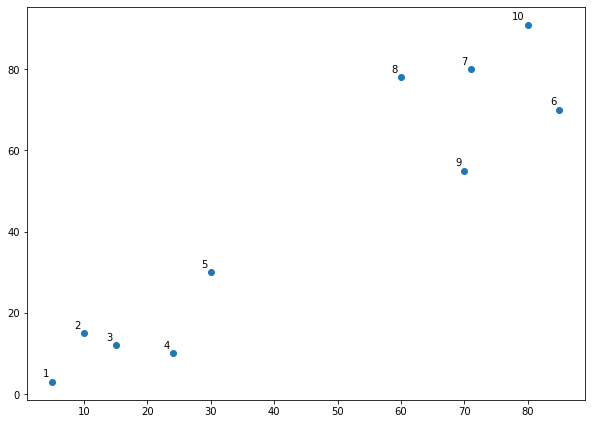

In [61]:
## Plotting our data points
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

Using dendograms to analyse the structure of existing clusters:

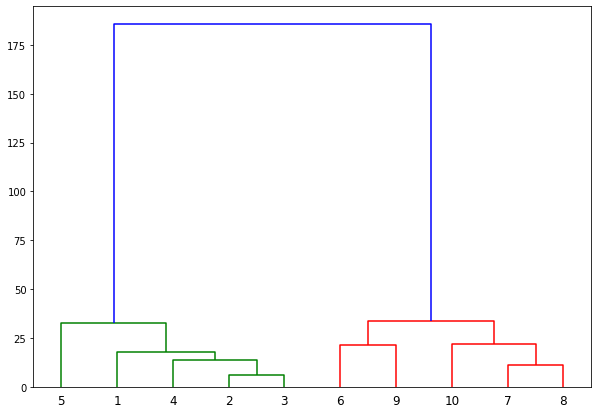

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'ward')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### H-Clustering with real world data :

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [0]:
customer_data = pd.read_csv('https://raw.githubusercontent.com/WajdiBenSaad/Random_Python_Stuff/master/data/shopping-data.csv')


In [22]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
##Kepping only the numeric variables we will use to compute our distances :
data = customer_data.iloc[:, 3:5].values

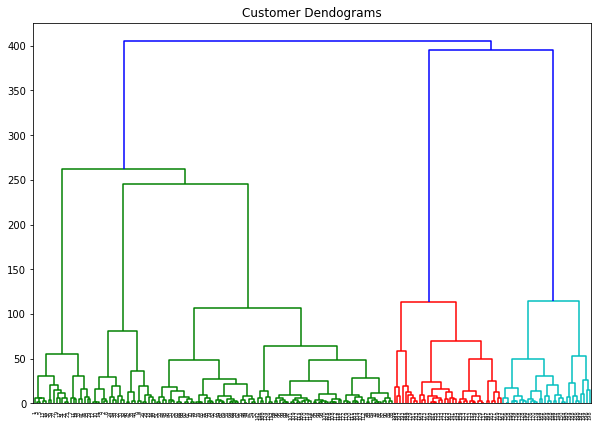

In [58]:
## Creating the dendrogram  for our data points :
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

What we can see from this dendrogram is that the number of clusters, or the choice of how many clusters to split the data points on is debatable. We can pick 3, 5 or even 10 different clusters. How ever we need to have a more robust way of making this decision. 
Applying the visual method gives us 5 clusters. we will see later down the road how we can enhane this selection with better selection methods.


In [80]:
## grouping the data points into our clusters 
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
## This will provide the cluster lable to each of the data points we have

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

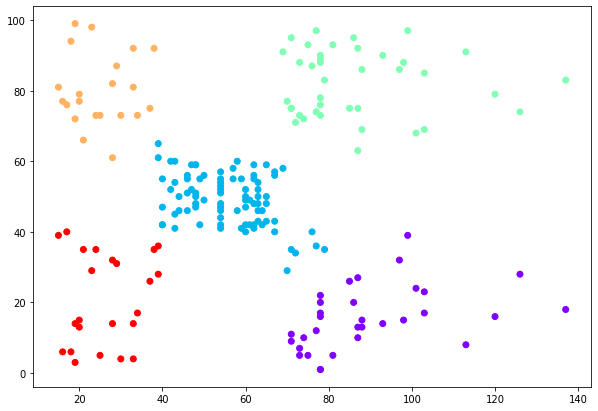

In [81]:
## Plotting the data points:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [56]:
##Let's check the cophenet coef to verify the quality of our clusters
## the closer this value is to 1, the better our clusters are in terms of preserving the distances:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


# generate the linkage matrix
Z = linkage(data, 'ward')

c, coph_dists = cophenet(Z, pdist(data))
c

0.7179298392392908

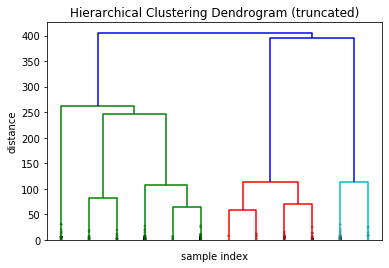

In [57]:
## In the case where we have a large number of data points to show in the plot, we can use the dendrogram truncation option

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

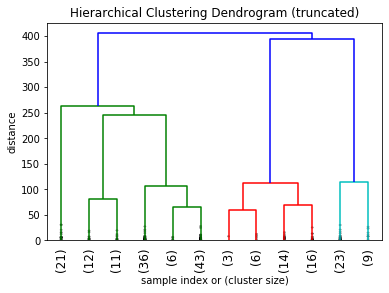

In [59]:
## Another enhancement to this dendrogram is to show the actual size of the clusters:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

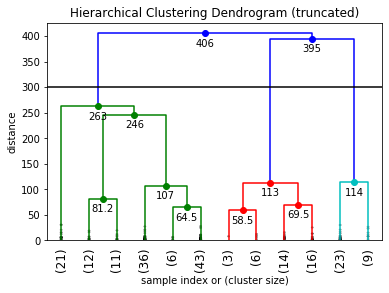

In [75]:
## let's calculate the Cut off distance, and how to calculate the optimal number of clusters:
# set cut-off to 50
max_d = 300  # max_d as in max_distance

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [76]:
## calculating inconsistency to find out the number of clusters:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 13.15227579,  16.00588178,  21.        ,   3.21039044],
       [ 12.61661535,  16.51007506,  23.        ,   3.44677654],
       [ 12.70459722,  18.43752791,  21.        ,   3.71387975],
       [ 18.09151571,  23.02726965,  29.        ,   3.84583428],
       [ 23.58452047,  27.36251771,  21.        ,   3.26116492],
       [ 18.93298166,  25.01394677,  23.        ,   3.79600371],
       [ 30.19948805,  46.8570015 ,  31.        ,   4.59814128],
       [ 43.16306607,  63.41769161,  29.        ,   3.45959562],
       [ 42.44797679,  73.57180704,  29.        ,   4.79003704],
       [ 80.7971316 , 104.10027727,  31.        ,   3.12067285]])

In [77]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 27.20522493,  22.07724466,   7.        ,   1.69098007],
       [ 29.50718243,  22.14867677,   7.        ,   1.8066981 ],
       [ 30.41117446,  23.85877866,   7.        ,   2.12786182],
       [ 46.64686845,  32.25750127,   7.        ,   1.8601475 ],
       [ 50.30959208,  34.23904875,   7.        ,   1.82565269],
       [ 44.62075241,  33.42997038,   7.        ,   2.07195111],
       [ 87.45535054,  74.70033132,   7.        ,   2.11778512],
       [116.01067179,  98.2703296 ,   7.        ,   1.49131445],
       [121.75878952, 123.40619994,   7.        ,   2.21302389],
       [227.24745833, 139.657175  ,   7.        ,   1.27750388]])

The Elbow method :

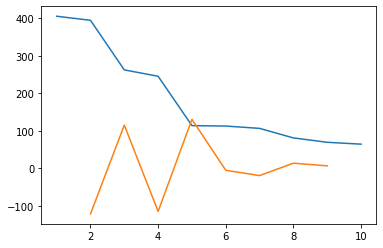

clusters: 5


In [83]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)